In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Q1.1

In [34]:
N = 1000
dist_mean = float(input("Enter Mean: ")) # 0
dist_var = float(input("Enter Variance: ")) # 1

In [35]:
# Actual PDF
def normal_pdf(x, mean, std):
    return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)

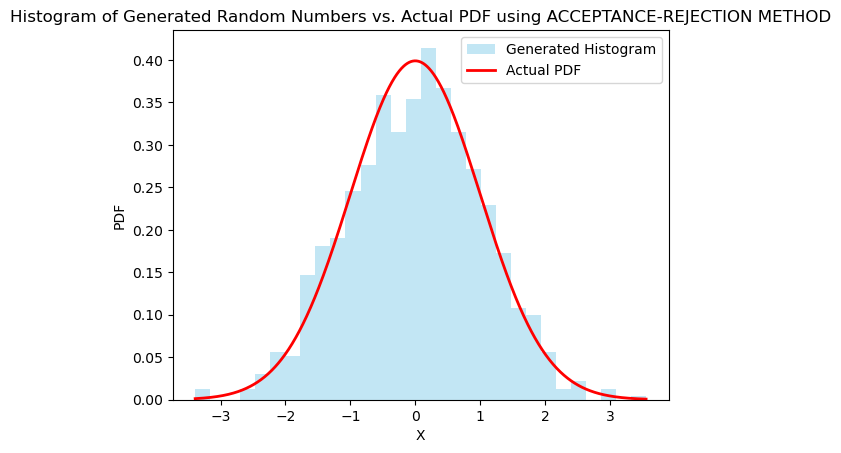

In [36]:
# METHOD 1: ACCEPTANCE-REJECTION METHOD
def acceptance_rejection(mean, std, N):
    Z = []
    f = lambda x: normal_pdf(x, mean, std)
    g = lambda x: np.exp(-0.5 * ((x - mean) / std) ** 2)
    x = np.linspace(mean - 10 * std, mean + 10 * std, 10000)
    C = max(f(x) / g(x))

    while len(Z) < N:
        Y = np.random.randn()
        U = np.random.rand()
        if U <= f(Y) / (C * g(Y)):
            Z.append(mean + std * Y)

    return np.array(Z)

Z_acceptance = acceptance_rejection(dist_mean, np.sqrt(dist_var), N)

plt.figure()
plt.hist(Z_acceptance, bins=30, density=True, alpha=0.5, color = 'skyblue', label='Generated Histogram')
x_vals = np.linspace(min(Z_acceptance), max(Z_acceptance), N)
plt.plot(x_vals, normal_pdf(x_vals, dist_mean, np.sqrt(dist_var)), 'r', linewidth=2, label='Actual PDF')
plt.xlabel('X')
plt.ylabel('PDF')
plt.title('Histogram of Generated Random Numbers vs. Actual PDF using ACCEPTANCE-REJECTION METHOD')
plt.legend()
plt.show()

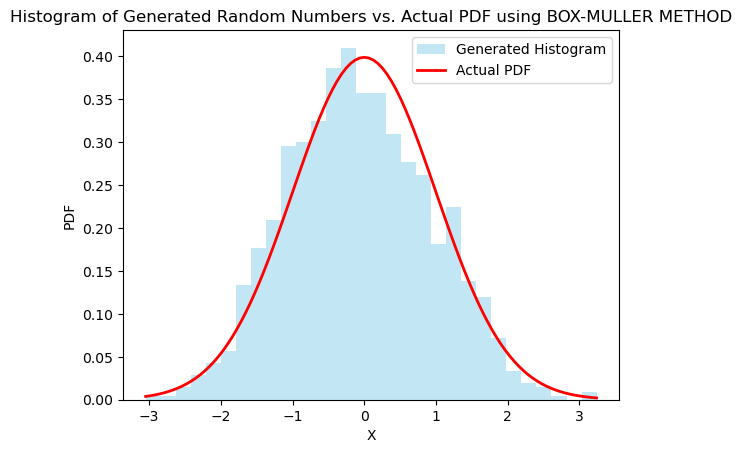

In [37]:
# METHOD 2: BOX-MULLER METHOD
def box_muller(mean, std, N):
    Z = []
    U = []

    for _ in range(N):
        D = np.random.exponential(2)
        seed = np.random.uniform(0, 2 * np.pi)
        Z.append(np.sqrt(D) * np.cos(seed))
        U.append(np.sqrt(D) * np.sin(seed))

    Z = mean + std * np.array(Z)
    U = mean + std * np.array(U)

    return np.array(U), np.array(Z)

U_box, Z_box = box_muller(dist_mean, np.sqrt(dist_var), N)

plt.figure()
plt.hist(Z_box, bins=30, density=True, alpha=0.5, color = 'skyblue' ,label='Generated Histogram')
x_vals = np.linspace(min(Z_box), max(Z_box), 100)
plt.plot(x_vals, normal_pdf(x_vals, dist_mean, np.sqrt(dist_var)), 'r', linewidth=2, label='Actual PDF')
plt.xlabel('X')
plt.ylabel('PDF')
plt.title('Histogram of Generated Random Numbers vs. Actual PDF using BOX-MULLER METHOD')
plt.legend()
plt.show()

In [46]:
def calculate_second_moment(random_numbers):
    return np.mean(np.array(random_numbers) ** 2)

_, rn_box_muller = box_muller(dist_mean, np.sqrt(dist_var), N)
rc_acceptance_rejection = acceptance_rejection(dist_mean, np.sqrt(dist_var), N)

second_moment_box_muller = calculate_second_moment(rn_box_muller)
second_moment_acceptance = calculate_second_moment(rc_acceptance_rejection)

print(f"Estiamte of the Second Moment (Box-Muller Method): {second_moment_box_muller}")
print(f"Estiamte of the Second Moment (Acceptance-Rejection Method): {second_moment_acceptance}")

second_moment_box_muller_sim = []
second_moment_acceptance_rejection_sim = []

for _ in range(50):
    _, rn_box_muller = box_muller(dist_mean, np.sqrt(dist_var), N)
    second_moment_box_muller_sim.append(calculate_second_moment(rn_box_muller))
    rc_acceptance_rejection = acceptance_rejection(dist_mean, np.sqrt(dist_var), N)
    second_moment_acceptance_rejection_sim.append(calculate_second_moment(rc_acceptance_rejection))

variance_box_muller = np.var(second_moment_box_muller_sim)
variance_acceptance_rejection = np.var(second_moment_acceptance_rejection_sim)

print(f"Estiamte of the Variance of second moment (Box-Muller Method): {variance_box_muller}")
print(f"Estiamte of the Variance of second moment (Acceptance-Rejection Method): {variance_acceptance_rejection}")

Estiamte of the Second Moment (Box-Muller Method): 1.0018570091474872
Estiamte of the Second Moment (Acceptance-Rejection Method): 1.0874738030444009
Estiamte of the Variance of second moment (Box-Muller Method): 0.0018932584607848973
Estiamte of the Variance of second moment (Acceptance-Rejection Method): 0.0019982259576709414


# Q1.2

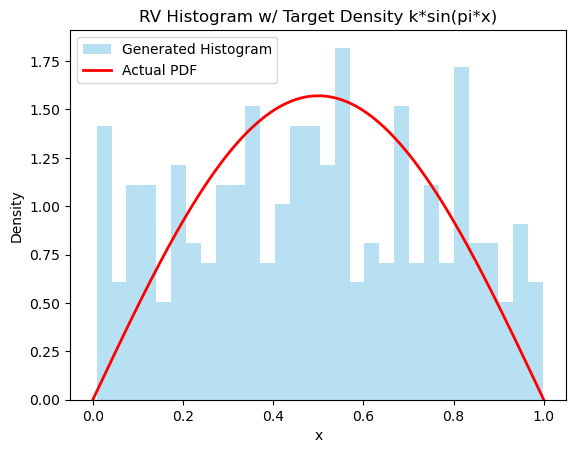

In [47]:
def generate_random_ksinx(n):
    generated_samples = []
    k = np.pi / 2  # Normalization constant k, calculated by hand
    m = 6  # Normalization constant m, calculated by hand

    while len(generated_samples) < n:
        random_uni_decision = np.random.uniform(0, 1)
        random_uni = np.random.uniform(0, 1)
        
        f1 = k * np.sin(np.pi * random_uni)
        f2 = m * random_uni * (1 - random_uni)

        if random_uni_decision < f1 / f2:
            generated_samples.append(random_uni)
    
    return np.array(generated_samples)

random_ksinx = generate_random_ksinx(300)

plt.hist(random_ksinx, bins=30, density=True, alpha=0.6, color='skyblue', label='Generated Histogram')
plt.title("RV Histogram w/ Target Density k*sin(pi*x)")
plt.xlabel("x")
plt.ylabel("Density")
x_values = np.linspace(0, 1, 1000)
actual_pdf = (np.pi / 2) * np.sin(np.pi * x_values)
plt.plot(x_values, actual_pdf, 'r', linewidth=2, label='Actual PDF')
plt.legend()
plt.show()

In [48]:
#CHECK

In [49]:
random_samples = generate_random_ksinx(300)
initial_second_moment = np.mean(random_samples ** 2)
print(f"Estiamte of the Second Moment: {initial_second_moment}")

second_moment_trials = [np.mean(generate_random_ksinx(300) ** 2) for _ in range(50)]
variance_of_second_moment = np.var(second_moment_trials)
print(f"Estimate of the Variance of the Second Moment: {variance_of_second_moment}")

Estiamte of the Second Moment: 0.31725206686625057
Estimate of the Variance of the Second Moment: 0.00024734367709578674


# Q1.3

In [56]:
N = 100000
s1, s2, s3 = 0, 0, 0  
estimate1_values = []
estimate2_values = []
estimate3_values = []

for _ in range(N):
    u = np.random.uniform(0, 1, 10)
    
    # Standard MC estimation
    f = 1 / (1 + u)
    estimate1 = f.mean()
    s1 += estimate1
    estimate1_values.append(estimate1)
    
    # Antithetic variable approach
    xp = u[:5]
    xn = 1 - xp
    x_s = np.concatenate([xp, xn])
    f2 = 1 / (1 + x_s)
    estimate2 = f2.mean()
    s2 += estimate2
    estimate2_values.append(estimate2)
    
    # Control variable approach
    f3 = 1 + u
    estimate3 = f3.mean()
    s3 += estimate3
    estimate3_values.append(estimate3)

estimate1 = s1 / N
estimate2 = s2 / N
estimate3 = s3 / N

integral_value = np.log(2)

def covar(values1, values2):
    return np.cov(values1, values2)[0, 1]

Var1 = np.var(estimate1_values)
Var2 = np.var(estimate2_values)
Var3 = np.var(estimate3_values)

C = -1 * (covar(estimate1_values, estimate3_values)) / Var3  
Var3 = np.var(np.array(estimate1_values) + C * (np.array(estimate3_values) - np.mean(estimate3_values)))

In [58]:
print(f"(a) Standard Monte Carlo Estimator")
print(f"    Estimated Value: {estimate1}")
print(f"    Actual Integral Value: {integral_value}")
print(f"    Original Sample Variance: {Var1}\n")

print(f"(b) Monte Carlo Estimator with Antithetic Variables")
print(f"    Estimated Value: {estimate2}")
print(f"    Actual Integral Value: {integral_value}")
print(f"    Variance reduction with Antithetic Variables: {Var2}\n")

print(f"(c) Monte Carlo Estimator with Control Variables")
print(f"    Estimated Value: {estimate3}")
print(f"    Actual Integral Value: {integral_value}")
print(f"    Variance reduction with Control Variables: {Var3}")

(a) Standard Monte Carlo Estimator
    Estimated Value: 0.6930059260501851
    Actual Integral Value: 0.6931471805599453
    Original Sample Variance: 0.0019507834857199588

(b) Monte Carlo Estimator with Antithetic Variables
    Estimated Value: 0.6931111385004959
    Actual Integral Value: 0.6931471805599453
    Variance reduction with Antithetic Variables: 0.00011944464275066243

(c) Monte Carlo Estimator with Control Variables
    Estimated Value: 1.5002415003195102
    Actual Integral Value: 0.6931471805599453
    Variance reduction with Control Variables: 6.135709704060647e-05


# Q3

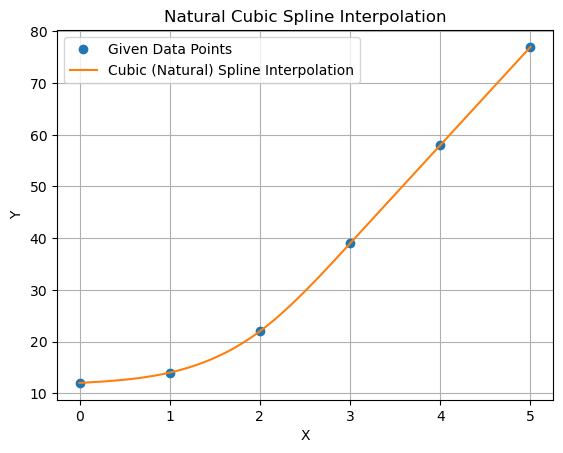

In [62]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([12, 14, 22, 39, 58, 77])

def cubic_spline_interpolation(x, y):
    n = len(x) - 1  # Number of intervals
    h = np.diff(x)  # Interval widths

    # Set up the system of equations
    A = np.zeros((n + 1, n + 1))
    B = np.zeros(n + 1)
    
    # Natural spline boundary conditions
    A[0, 0] = 1
    A[n, n] = 1
    
    # Fill the matrix for the inner points
    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        B[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])
    
    c = np.linalg.solve(A, B)
    b = [(y[i+1] - y[i]) / h[i] - h[i] * (2*c[i] + c[i+1]) / 3 for i in range(n)]
    d = [(c[i+1] - c[i]) / (3*h[i]) for i in range(n)]
    a = y[:-1]
    
    return a, b, c[:-1], d

a, b, c, d = cubic_spline_interpolation(x, y)
x_plot = np.linspace(min(x), max(x), 100)
y_plot = []

for xi in x_plot:
    for i in range(len(x) - 1):
        if x[i] <= xi <= x[i+1]:
            dx = xi - x[i]
            yi = a[i] + b[i]*dx + c[i]*dx**2 + d[i]*dx**3
            y_plot.append(yi)
            break

plt.plot(x, y, 'o', label="Given Data Points")
plt.plot(x_plot, y_plot, label="Cubic (Natural) Spline Interpolation")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Natural Cubic Spline Interpolation")
plt.legend()
plt.grid(True)
plt.show()

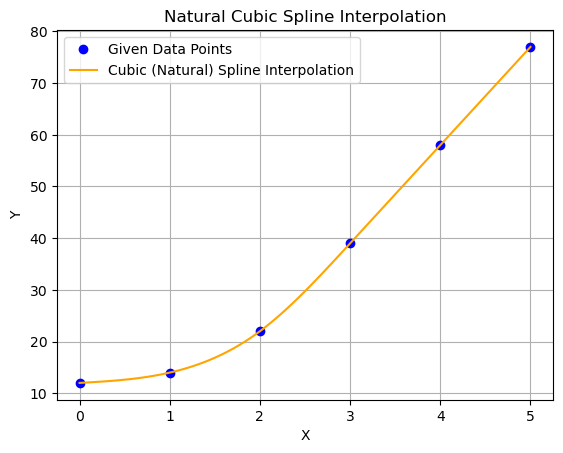

In [63]:
# Input data 
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([12, 14, 22, 39, 58, 77])

def cubic_spline_interpolation(x, y):
    n = len(x) - 1  # Number of intervals
    h = np.diff(x)  # Interval widths

    # System of equations
    A = np.zeros((n + 1, n + 1))
    B = np.zeros(n + 1)
    
    # Natural spline boundary conditions
    A[0, 0] = 1
    A[n, n] = 1

    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        B[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])
    
    c = np.linalg.solve(A, B)

    b = [(y[i+1] - y[i]) / h[i] - h[i] * (2*c[i] + c[i+1]) / 3 for i in range(n)]
    d = [(c[i+1] - c[i]) / (3*h[i]) for i in range(n)]
    a = y[:-1]  # The 'a' coefficients are the y values at each interval start
    
    return a, b, c[:-1], d  # Returning all coefficients except the last c

# Spline coefficients
a, b, c, d = cubic_spline_interpolation(x, y)

# Evaluate spline at any x-value
def evaluate_spline(x_val, x, a, b, c, d):
    for i in range(len(x) - 1):
        if x[i] <= x_val <= x[i + 1]:
            dx = x_val - x[i]
            return a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3

x_plot = np.linspace(x[0], x[-1], 100)
y_plot = [evaluate_spline(xi, x, a, b, c, d) for xi in x_plot]

plt.plot(x, y, 'o', label="Given Data Points", color="blue")
plt.plot(x_plot, y_plot, label="Cubic (Natural) Spline Interpolation", color="orange")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Natural Cubic Spline Interpolation")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

The graph shows the original data points and the interpolated curve (spline). The spline smoothly passes through each given (x,y) data point and extends smoothly between them, creating a continuous curve that is cubic in each interval. This resultant curve could be used for interpolation further outward.

# Q4

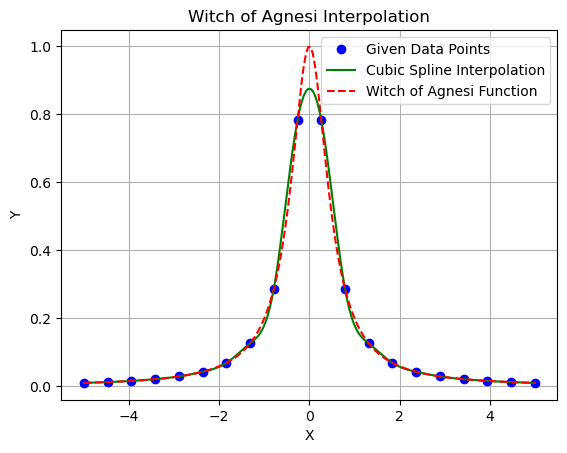

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Witch of Agnesi function
def witch_of_agnesi(x):
    return 1 / (4 * x**2 + 1)

# Set up data points
x_data = np.linspace(-5, 5, 20)  # 20 intervals between -5 and 5
y_data = witch_of_agnesi(x_data)

# Function to perform cubic spline interpolation (reusing the previous cubic_spline_interpolation and evaluation functions)
def cubic_spline_interpolation(x, y):
    n = len(x) - 1
    h = np.diff(x)

    A = np.zeros((n + 1, n + 1))
    B = np.zeros(n + 1)

    A[0, 0], A[n, n] = 1, 1

    for i in range(1, n):
        A[i, i-1], A[i, i], A[i, i+1] = h[i-1], 2 * (h[i-1] + h[i]), h[i]
        B[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])

    c = np.linalg.solve(A, B)
    b = [(y[i+1] - y[i]) / h[i] - h[i] * (2*c[i] + c[i+1]) / 3 for i in range(n)]
    d = [(c[i+1] - c[i]) / (3*h[i]) for i in range(n)]
    a = y[:-1]
    
    return a, b, c[:-1], d

def evaluate_spline(x_val, x, a, b, c, d):
    for i in range(len(x) - 1):
        if x[i] <= x_val <= x[i + 1]:
            dx = x_val - x[i]
            return a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3

# Interpolation
a, b, c, d = cubic_spline_interpolation(x_data, y_data)
x_plot = np.linspace(-5, 5, 200)
y_spline = [evaluate_spline(xi, x_data, a, b, c, d) for xi in x_plot]

# Plotting
plt.plot(x_data, y_data, 'o', label="Given Data Points", color="blue")
plt.plot(x_plot, y_spline, label="Cubic Spline Interpolation", color="green")
plt.plot(x_plot, witch_of_agnesi(x_plot), label="Witch of Agnesi Function", color="red", linestyle="--")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Witch of Agnesi Interpolation")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()